In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional 
from tensorflow.keras.models import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow.keras.utils as ku 
from nltk.tokenize import word_tokenize 
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
! gdown --id 1h26b_5bGs-tbu0Cuw-1yK--BOA4vWzi_

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1h26b_5bGs-tbu0Cuw-1yK--BOA4vWzi_
To: /content/puisiChairil.xlsx-Sheet1.txt
100% 33.3k/33.3k [00:00<00:00, 71.9MB/s]


In [3]:
DATA_URLS = ['1h26b_5bGs-tbu0Cuw-1yK--BOA4vWzi_']
DIR_NAME = 'chairil'

DATA_FILE_EXT = '.txt'
DATA_DIR_PATH = './data/' + DIR_NAME

In [5]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=d15b26d7b2c48237a19803ecb5909ae7f1f3e4ae5d2e7ac240ac20b53177d75b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [6]:
import os
import wget

def download_wget(URLS, FILE_EXT, DIR_PATH):
    for url in URLS:
        target_file = url.split('/')[-1]
        file_url = 'https://drive.google.com/uc?export=download&id=1h26b_5bGs-tbu0Cuw-1yK--BOA4vWzi_'
        if target_file not in os.listdir(DIR_PATH):
            print('Downloading', file_url)
            wget.download(file_url, out=DIR_PATH)
            file_path = os.path.join(DIR_PATH, target_file)
            print('\n\nExtracting files from', file_path)
            print('Done!')
        else:
            print('Already downloaded', file_url)


if not os.path.isdir('data'):
    os.mkdir('data')

if not os.path.isdir('data/' + DIR_NAME):
    os.mkdir('data/' + DIR_NAME)              


download_wget(DATA_URLS, DATA_FILE_EXT, DATA_DIR_PATH)




Extracting files from ./data/chairil/1h26b_5bGs-tbu0Cuw-1yK--BOA4vWzi_
Done!


In [7]:
os.listdir(DATA_DIR_PATH)
data = open('./data/chairil/puisiChairil.xlsx-Sheet1.txt').read()
corpus = data.lower().split("\n")


In [8]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [9]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(LSTM(150, return_sequences = True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(total_words, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 7, 100)            176300    
                                                                 
 bidirectional (Bidirectiona  (None, 7, 300)           301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 7, 300)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 881)               88981     
                                                                 
 dense_1 (Dense)             (None, 1763)              1554966   
                                                        

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(predictors, label, epochs=120, verbose=1)

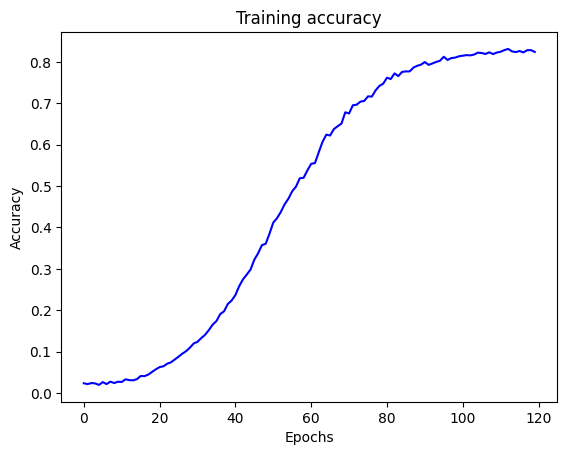

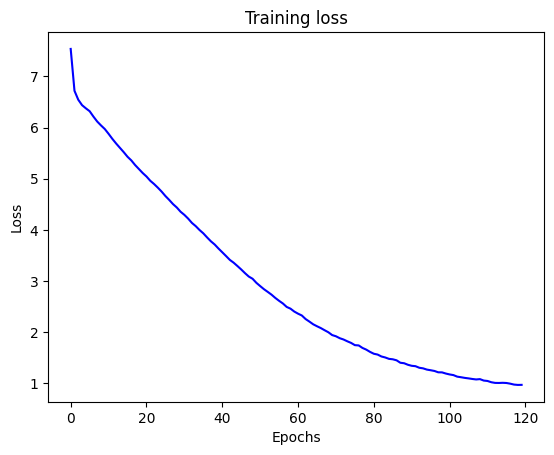

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

# Get the number of epochs
epochs = range(len(acc))

# Plot accuracy per epoch
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training accuracy')

plt.figure()

# Plot loss per epoch
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training loss')

plt.show()

In [15]:
seed_texts = ['di', 'dan', 'aku', 'yang', 'tidak']
next_words = 100
final_text = '';

for seed_text in seed_texts:
  for _ in range(next_words):
      token_list = tokenizer.texts_to_sequences([seed_text])[0]
      token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
      predicted_probs = model.predict(token_list)[0]
      predicted = np.argmax(predicted_probs)
      output_word = ""
      for word, index in tokenizer.word_index.items():
          if index == predicted:
              output_word = word
              break
      seed_text += " " + output_word

  final_text += seed_text + '\n'
    

print(final_text)



1/1 [==============================] - 0s 26ms/step
di antara gudang rumah tua pada kenal tidak tempuh tidak gamang kelam ada tidak lagi jalan dia bertanya berpeluk jalan apa jalan apa jalan apa apa apa nasib sebentar kita lagi dulu lagi terbuka lahir ini tuan kaku saja saja kini debu masih petikan kertas karno laut dia dia lagi lekas ada tidak terus tidak perduli dia bertanya mempercepat baru pelabuhan dipegang klewang pasti tahun diburu di ada ada zat satu perbuat satu jemu segala lampu merah kaktus di dada bermain sangkar reda ini lekas lagi ada berada dan mau ” tenggelam kita ada juga tetap jalan apa jalan kau tempuh
dan kini tanah dan air tidur hilang buah nyala dalam menjadi putih pelangi reda mengalir satu caya tapi jemu senjakala senjakala biduan gadis lagi memanggil mewarna di berbaring tak dapat jalan satu tidak tahun tidak lupa jadi — sebentar tahun lagi begini terbuka belum terbuka mari yang lagi terbuka mari lagi terbuka belum beku whisky meniup meniup meniup udara flight 